In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [6]:
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
df.shape        # rows, columns
df.info()       # data types + missing values
df.describe()   # summary statistics
df.isnull().sum()  # missing values count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
print("Shape:", df.shape)  # rows & columns
df.info()                  # data types & null counts
df.describe(include='all') # summary stats for all columns
df.isnull().sum()          # missing values per column


Shape: (891, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  HasCabin     891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 87.1+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
dtype: int64

In [10]:
print(df['Survived'].value_counts(normalize=True))  # survival rate %
print(df['Pclass'].value_counts())
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts(dropna=False))

0    0.616162
1    0.383838
Name: Survived, dtype: float64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


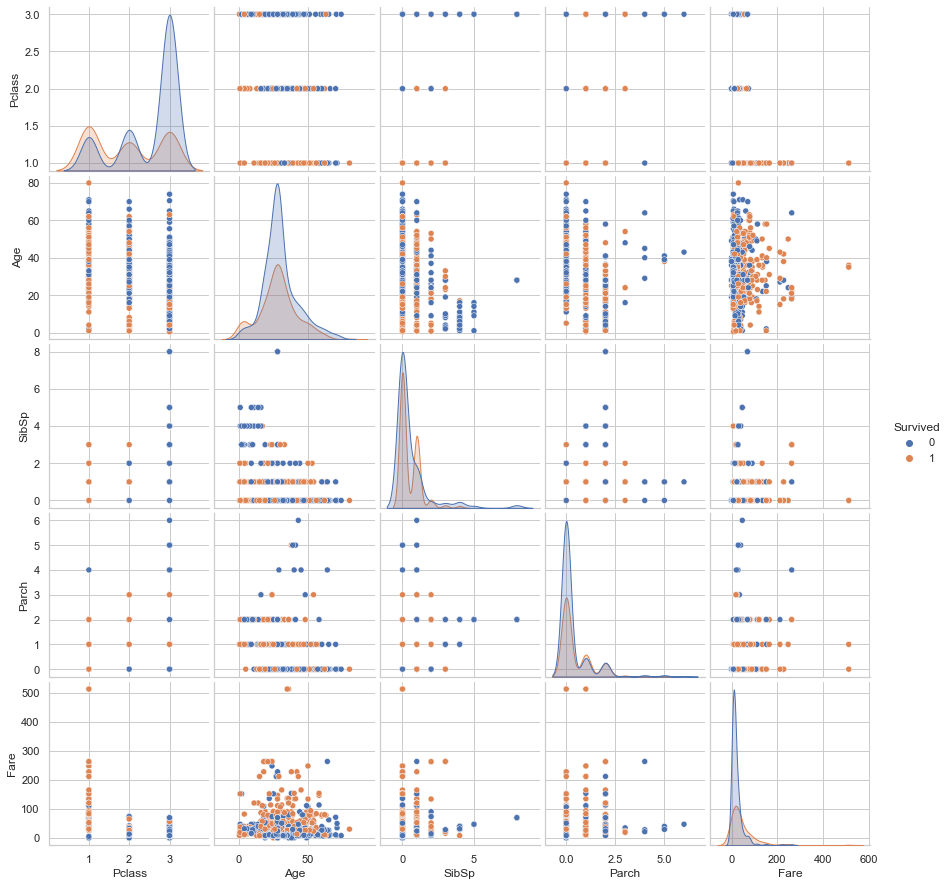

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot – shows pairwise relationships
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived')
plt.show()

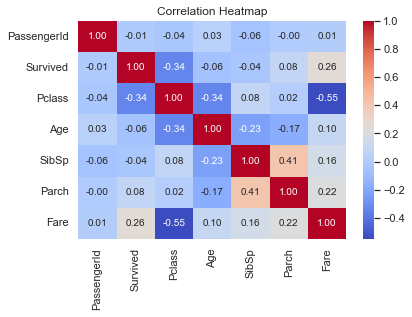

In [17]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

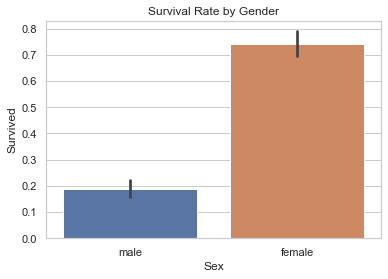

In [20]:
# 1. Gender vs Survival
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

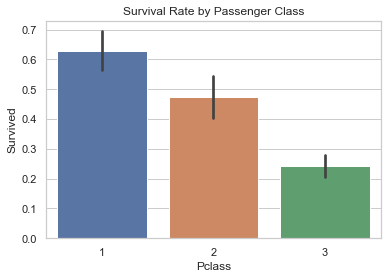

In [21]:
# 2. Passenger Class vs Survival
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

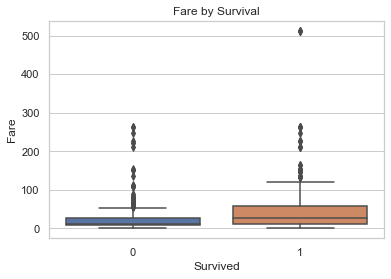

In [22]:
# 3. Fare vs Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare by Survival")
plt.show()

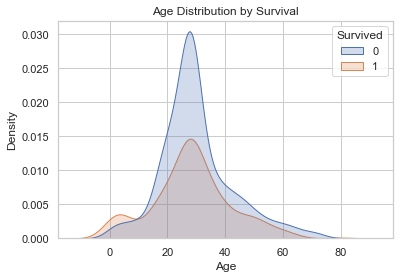

In [23]:
# 4. Age vs Survival
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title("Age Distribution by Survival")
plt.show()

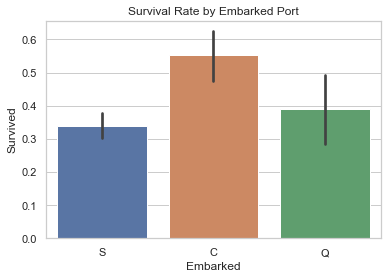

In [24]:
# 5. Embarked Port vs Survival
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarked Port")
plt.show()

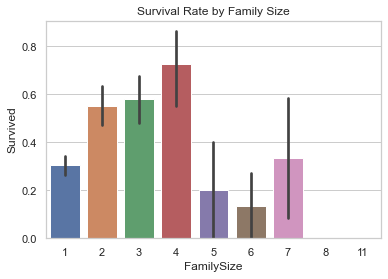

In [25]:
# 6. Family Size vs Survival
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()

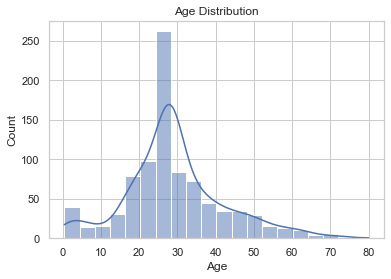

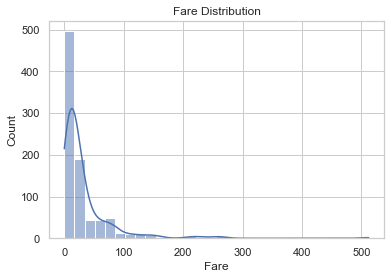

In [26]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()


For Age Distribution:

The age distribution is slightly right-skewed, with most passengers between 20–40 years old.
There is a noticeable group of children under 10 years, and fewer elderly passengers above 60 years.

For Fare Distribution:

Fare distribution is highly right-skewed, meaning most passengers paid low fares.
A small number of passengers paid extremely high fares, indicating a small group of wealthier travelers.

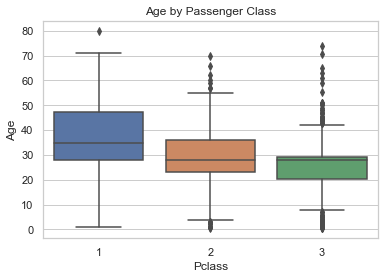

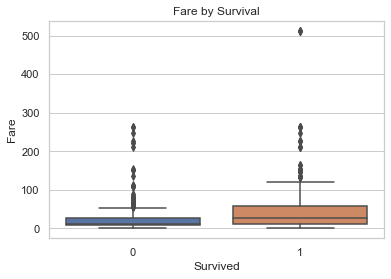

In [27]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age by Passenger Class")
plt.show()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare by Survival")
plt.show()


Boxplots
Age by Passenger Class

First-class passengers tend to be older on average compared to third-class passengers. The median age is highest for Pclass 1 and lowest for Pclass 3. The spread is wider in lower classes.

Fare by Survival

Survivors generally paid higher fares than non-survivors. The median fare for survivors is higher, and there are more extreme outliers among survivors, suggesting that ticket price (and likely class) was linked to survival.


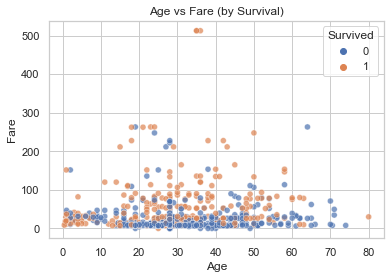

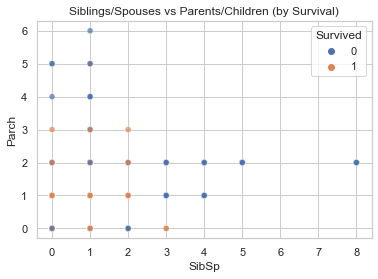

In [28]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.7)
plt.title("Age vs Fare (by Survival)")
plt.show()

sns.scatterplot(x='SibSp', y='Parch', hue='Survived', data=df, alpha=0.7)
plt.title("Siblings/Spouses vs Parents/Children (by Survival)")
plt.show()


Scatterplots
Age vs Fare (by Survival)

Passengers with higher fares were mostly in first class and had better survival chances. Younger children also show a higher survival rate regardless of fare. Non-survivors cluster at lower fares.

Siblings/Spouses vs Parents/Children (by Survival)

Passengers traveling in small family groups (2–4 total members) had better survival rates than those traveling alone or in very large families. Extremely large families had the lowest survival chances.

## Summary of Findings

- The overall survival rate in the dataset is approximately **38%**, with **62%** of passengers not surviving.  
- **Gender** is a strong factor in survival — about **74% of females survived** compared to only **19% of males**.  
- **Passenger class (Pclass)** is linked to survival:  
  - **Pclass 1** had the highest survival rate (~63%),  
  - **Pclass 3** had the lowest (~24%).  
- **Fare** is positively correlated with survival — higher-paying passengers had better chances of survival, likely due to being in higher classes.  
- **Age distribution** shows most passengers were between 20–40 years. Children under 10 had a slightly higher chance of survival, though this trend is less strong than gender or class.  
- **Embarked port** affects survival: passengers from Cherbourg (C) had a higher survival rate, probably due to a higher proportion of first-class passengers.  
- **Family size** affects survival: small families (2–4 members) had better survival rates than passengers traveling alone or in large families.  
- **Cabin data** is missing for most passengers (~77%), but those with recorded cabin numbers tend to have higher survival rates, suggesting they were in better-class accommodations.  
- **Fare distribution** is highly right-skewed, with most passengers paying low fares and a few paying very high amounts.  
- Outliers exist in both **Age** and **Fare**, especially among survivors who paid very high fares.  

**Overall insight:**  
Survival was strongly influenced by **gender**, **ticket class**, and **fare paid**. Family size and embarkation port also played a role, while age had a moderate impact. Wealthier passengers in higher classes, especially women and children, had the greatest chances of survival.
